In [1]:
from patrolling_car_copy.controller import sys_ctrl
import pickle
import hard_tests
import random
import visualization.animate as animate

import tulip as tlp
from tulip import transys, abstract, spec, synth
from IPython.display import HTML

import networkx as nx

import patrolling_car_tests_copy

/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/tulip-1.4.0-py3.8.egg/tulip/transys/mathset.py:719: SyntaxWarning: "is" with a literal. Did you mean "=="?
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/tulip-1.4.0-py3.8.egg/tulip/transys/mathset.py:719: SyntaxWarning: "is" with a literal. Did you mean "=="?
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/tulip-1.4.0-py3.8.egg/tulip/transys/labeled_graphs.py:1218: SyntaxWarning: "is" with a literal. Did you mean "=="?
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/tulip-1.4.0-py3.8.egg/tulip/transys/labeled_graphs.py:1226: SyntaxWarning: "is" with a literal. Did you mean "=="?
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/tulip-1.4.0-py3.8.egg/tulip/transys/labeled_graphs.py:1218: SyntaxWarning: "is" with a literal. Did you mean "=="?
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/pyt

In [2]:
path = 'patrolling_car_copy/'

In [3]:
with open(path + 'graph', "rb") as file:
    G = pickle.load(file)

In [4]:
# Load the system controller from the saved file
with open(path + "ctrl", "rb") as file:
    ctrl = pickle.load(file)

In [5]:
# Labeling the nodes like system nodes
# for edge in ctrl.edges:
#     for (key, val) in ctrl.edges[edge].items():
#         ctrl.nodes[edge[1]][key] = val

In [6]:
G.nodes[0]

{'b': 2, 'move': False, 'r': 20, 'fuel': 14, 'shape': 'oval'}

In [7]:
r_set = set()
for node in G.nodes:
    r_set.add(G.nodes[node]['r'])

In [8]:
# Conversions
r_conversion = ['c00', 'c01', 'c02', 'c03', 'c04', 'c10', 'c11', 'c12', 'c13', 'c14', 'c20', 'c21', 'c22', 'c23', 'c24', 'c30', 'c31', 'c32', 'c33', 'c34', 'c40', 'c41', 'c42', 'c43', 'c44'] # TODO: Double check this conversion
for node in G.nodes:
    assert G.nodes[node]['r'] < len(r_conversion), G.nodes[node]['r']
    G.nodes[node]['r'] = r_conversion[G.nodes[node]['r']]

In [9]:
# Removing nodes that violate the environment's safety

In [10]:
G.nodes[0]

{'b': 2, 'move': False, 'r': 'c40', 'fuel': 14, 'shape': 'oval'}

MovieWriter ffmpeg unavailable; using Pillow instead.


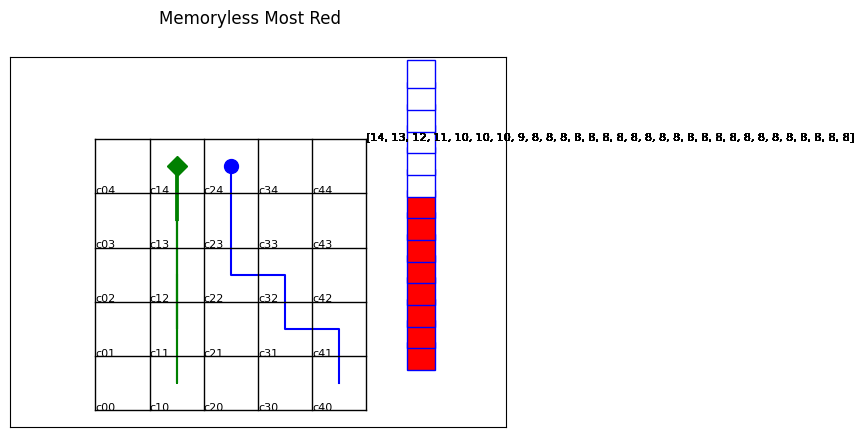

In [11]:
# Running the test that greedily picks the next state with the most unsafe 
# nodes
title = "Memoryless Most Red"
num_red_sys_metric = hard_tests.find_num_red_successors(G)
b_signal, trajectory = patrolling_car_tests_copy.rand_test_with_metric(G, 0, hard_tests.memoryless_max_metric, num_red_sys_metric, 30)
patrolling_car_tests_copy.animate_test(ctrl, b_signal, title)

MovieWriter ffmpeg unavailable; using Pillow instead.


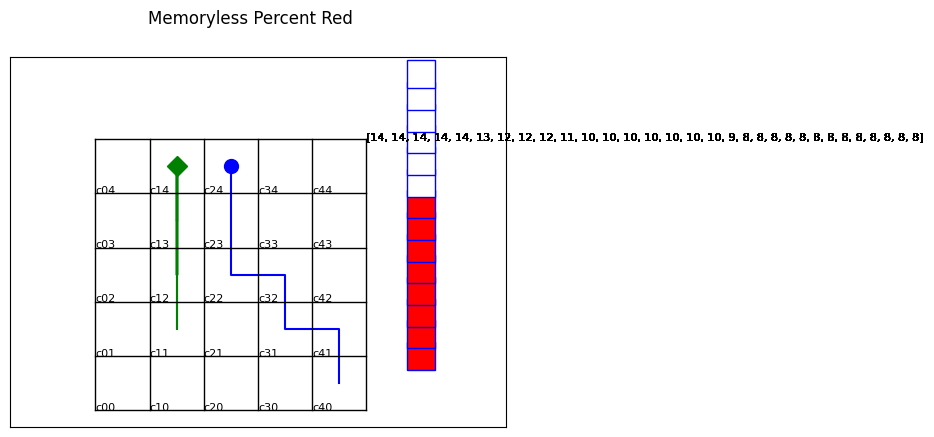

In [12]:
# Running the test that greedily picks the next state with the most unsafe 
# nodes
title = "Memoryless Percent Red"
percent_red_sys_metric = hard_tests.find_percent_red_successors(G)
b_signal, trajectory = patrolling_car_tests_copy.rand_test_with_metric(G, 0, hard_tests.memoryless_max_metric, percent_red_sys_metric, 30)
patrolling_car_tests_copy.animate_test(ctrl, b_signal, title)

MovieWriter ffmpeg unavailable; using Pillow instead.


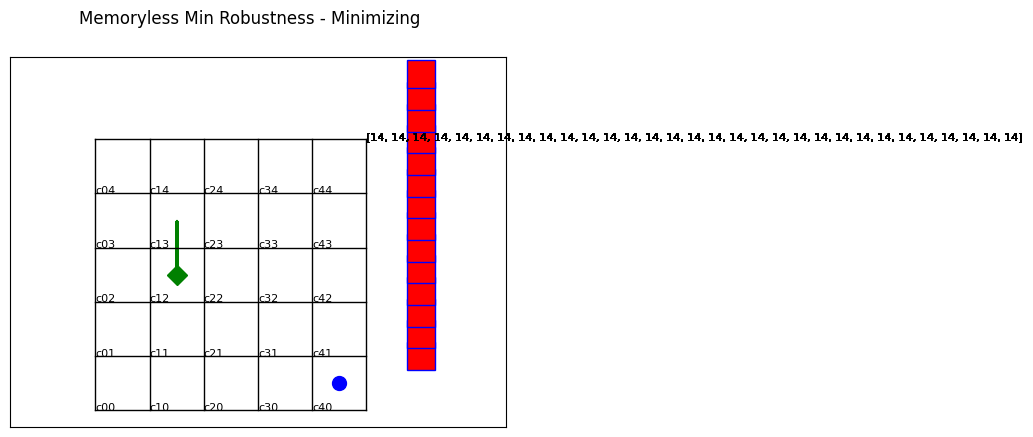

In [13]:
title = "Memoryless Min Robustness - Minimizing"
min_robustness_env_metric = hard_tests.find_min_robustness(G)
b_signal, trajectory = patrolling_car_tests_copy.rand_test_with_metric(G, 0, hard_tests.memoryless_robustness_minimization, min_robustness_env_metric, 30)
patrolling_car_tests_copy.animate_test(ctrl, b_signal, title)

MovieWriter ffmpeg unavailable; using Pillow instead.


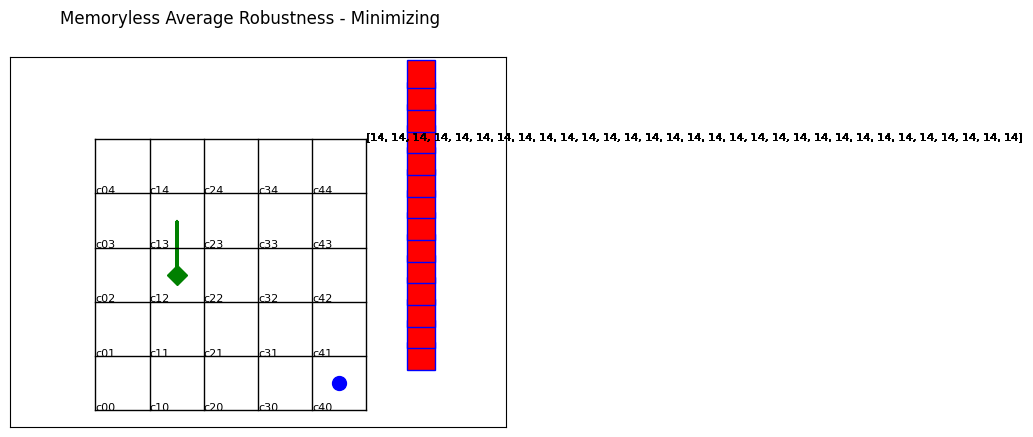

In [14]:
title = "Memoryless Average Robustness - Minimizing"
avg_robustness_env_metric = hard_tests.find_avg_robustness(G)
b_signal, trajectory = patrolling_car_tests_copy.rand_test_with_metric(G, 0, hard_tests.memoryless_robustness_minimization, avg_robustness_env_metric, 30)
patrolling_car_tests_copy.animate_test(ctrl, b_signal, title)

MovieWriter ffmpeg unavailable; using Pillow instead.


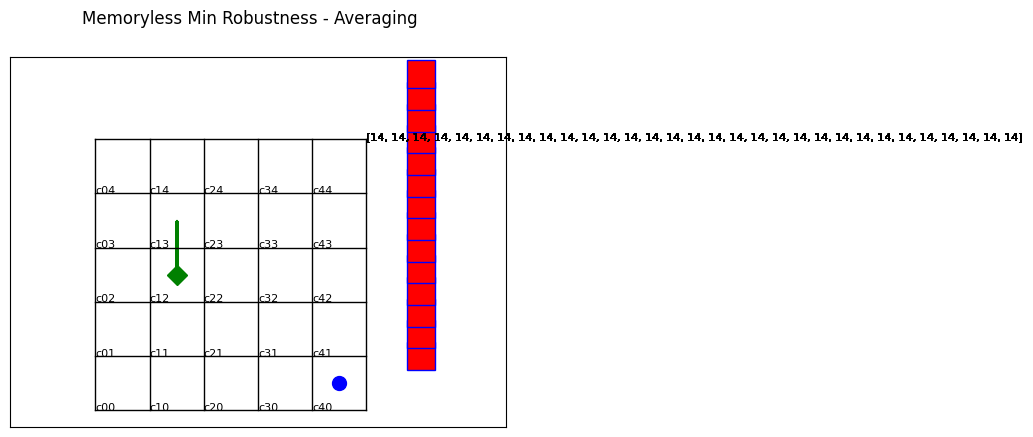

In [15]:
title = "Memoryless Min Robustness - Averaging"
# min_robustness_env_metric = hard_tests.find_min_robustness(G)
b_signal, trajectory = patrolling_car_tests_copy.rand_test_with_metric(G, 0, hard_tests.memoryless_robustness_averaging, min_robustness_env_metric, 30)
patrolling_car_tests_copy.animate_test(ctrl, b_signal, title)

MovieWriter ffmpeg unavailable; using Pillow instead.


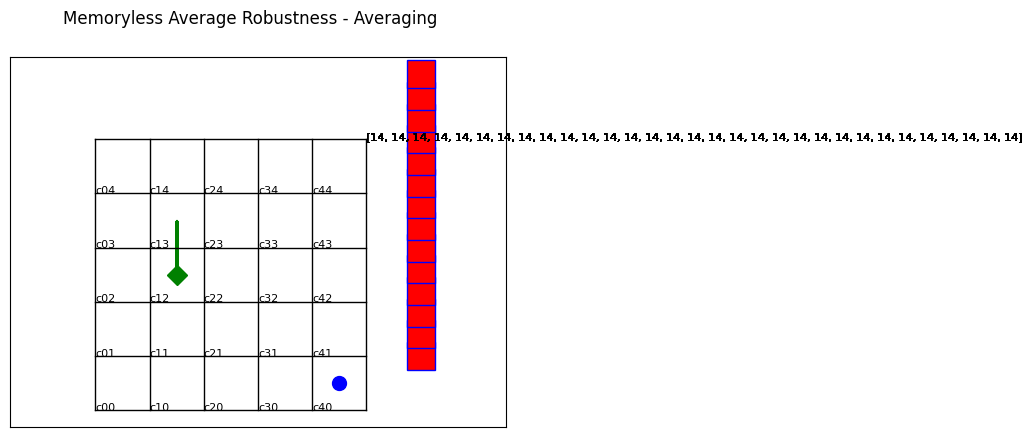

In [16]:
title = "Memoryless Average Robustness - Averaging"
# avg_robustness_env_metric = hard_tests.find_avg_robustness(G)
b_signal, trajectory = patrolling_car_tests_copy.rand_test_with_metric(G, 0, hard_tests.memoryless_robustness_averaging, avg_robustness_env_metric, 30)
patrolling_car_tests_copy.animate_test(ctrl, b_signal, title)

# Creating the Potential Hard Tests

## Memoryless Most Red

In [17]:
# num_red_sys_metric = hard_tests.find_num_red_successors(G)

In [18]:
memoryless_most_red = hard_tests.memoryless_max_metric(G, num_red_sys_metric)

# Memoryless Percent Red

In [19]:
# percent_red_sys_metric = hard_tests.find_percent_red_successors(G)

In [20]:
memoryless_percent_red = hard_tests.memoryless_max_metric(G, percent_red_sys_metric)

## Memoryless Min Robustness - Minimizing 

In [21]:
# min_robustness_env_metric = hard_tests.find_min_robustness(G)

In [22]:
memoryless_min_rob_minimizing = hard_tests.memoryless_robustness_minimization(G, min_robustness_env_metric)

## Memoryless Average Robustness - Minimizing

In [23]:
# avg_robustness_env_metric = hard_tests.find_avg_robustness(G)

In [24]:
memoryless_avg_rob_minimizing = hard_tests.memoryless_robustness_minimization(G, avg_robustness_env_metric)

## Memoryless Min Robustness - Averaging

In [25]:
# min_robustness_env_metric = hard_tests.find_min_robustness(G)

In [26]:
memoryless_min_rob_averaging = hard_tests.memoryless_robustness_averaging(G, min_robustness_env_metric)

## Memoryless Average Robustness - Averaging

In [27]:
# avg_robustness_env_metric = hard_tests.find_avg_robustness(G)

In [28]:
memoryless_avg_rob_averaging = hard_tests.memoryless_robustness_averaging(G, avg_robustness_env_metric)

# Comparing Tests

In [29]:
memoryless_most_red == memoryless_percent_red

False

In [30]:
memoryless_avg_rob_minimizing == memoryless_min_rob_minimizing

True

In [31]:
memoryless_avg_rob_averaging == memoryless_min_rob_averaging

True

In [32]:
memoryless_min_rob_minimizing == memoryless_min_rob_averaging

True

In [33]:
memoryless_avg_rob_minimizing == memoryless_avg_rob_averaging

True

# Number of Transitions

In [34]:
for key, val in memoryless_most_red.items():
    assert(len(val) == 1)

AssertionError: 

In [ ]:
for key, val in memoryless_percent_red.items():
    assert(len(val) == 1)

In [ ]:
for key, val in memoryless_min_rob_minimizing.items():
    assert(len(val) == 1)

In [ ]:
for key, val in memoryless_avg_rob_minimizing.items():
    assert(len(val) == 1)

In [ ]:
for key, val in memoryless_min_rob_averaging.items():
    assert(len(val) == 1)

In [ ]:
for key, val in memoryless_avg_rob_averaging.items():
    assert(len(val) == 1)